In [92]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.manifold import MDS
import seaborn as sns         
import numpy as np


def plot_mds(original, gan):
    import seaborn as sns
    sns.set_theme(style="ticks", palette="pastel")
    
    # Matplotlib settings
    fig, ax = plt.subplots(1, 1, figsize=(5.5, 4))
    sns.scatterplot(x=gan[:, 0], y=gan[:, 1], data=gan, color="g")
    sns.scatterplot(x=original[:, 0], y=original[:, 1], data=original, color="b")
    
    # Perfumaria
    ax.set_xlabel("X component")
    ax.set_ylabel("Y component")
    ax.set_title("Multidimensional scaling")
    plt.legend(["Proposed workflow", "Traditional workflow"], 
    bbox_to_anchor=(0, 1.02,1, 0.2), loc="upper left", ncol=2)

    #plt.savefig("data/results/mds.png", dpi=500, bbox_inches='tight')


def mds_plots(snesim_realizations_path, gan_realizations_path):
    traditional = np.load(snesim_realizations_path).reshape((100, -1))
    proposed = np.load(gan_realizations_path).reshape((100, -1))

    mds = MDS(n_components=3, metric=True, random_state=0)
    # Get the embeddings
    original = mds.fit_transform(
        np.load("snesim/data/realizations.npy").reshape((100, -1))
        )

    # Get the embeddings
    gan = mds.fit_transform(
        np.load("generative_model/data/realizations.npy").reshape((100, -1))
        )
    plot_mds(original, gan)
    return original, gan

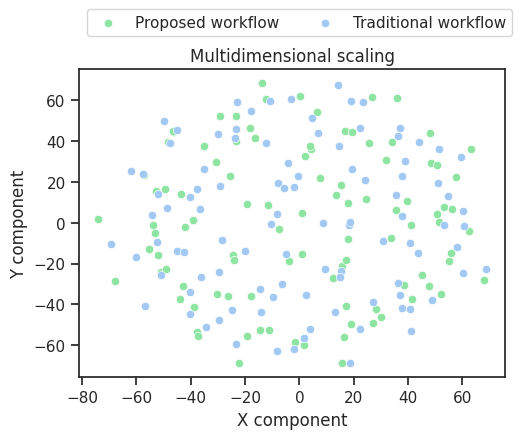

In [93]:
original, gan = mds_plots(snesim_realizations_path="snesim/data/realizations.npy",
            gan_realizations_path="generative_model/data/realizations.npy")

In [94]:
x_t, y_t, z_t = original.T
x_p, y_p, z_p = gan.T

def centroidnp(arr):
    length, dim = arr.shape
    return np.array([np.sum(arr[:, i])/length for i in range(dim)])

centro_t = centroidnp(original)
centro_p = centroidnp(gan)

import math

dist_trad = [math.dist(point, centro_t) for point in original]
dist_prop = [math.dist(point, centro_p) for point in gan]

Text(0.5, 1.0, 'Proposto')

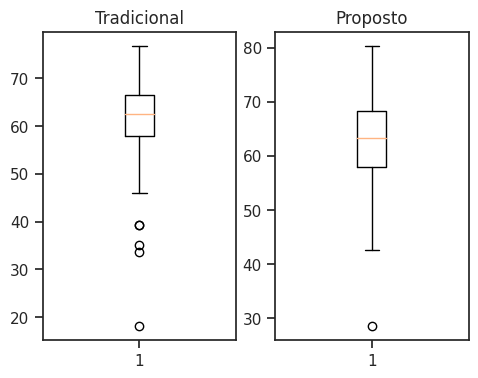

In [95]:
fig, ax = plt.subplots(1, 2, figsize=(5.5, 4))
ax[0].boxplot(dist_trad)
ax[0].set_title("Tradicional")
ax[1].boxplot(dist_prop)
ax[1].set_title("Proposto")

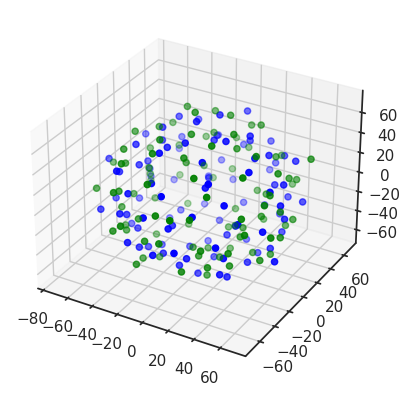

In [47]:
ax = plt.axes(projection='3d')
ax.scatter3D(x_t, y_t, z_t, c="blue")
ax.scatter3D(x_p, y_p, z_p, c="green")

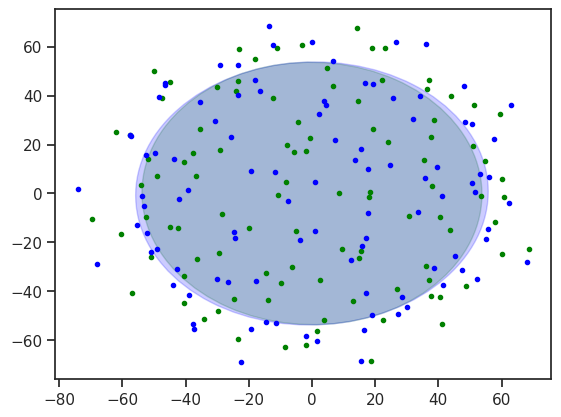

In [69]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def plot_point_cov(points, nstd=2, ax=None, **kwargs):
    """
    Plots an `nstd` sigma ellipse based on the mean and covariance of a point
    "cloud" (points, an Nx2 array).

    Parameters
    ----------
        points : An Nx2 array of the data points.
        nstd : The radius of the ellipse in numbers of standard deviations.
            Defaults to 2 standard deviations.
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
        Additional keyword arguments are pass on to the ellipse patch.

    Returns
    -------
        A matplotlib ellipse artist
    """
    pos = points.mean(axis=0)
    cov = np.cov(points, rowvar=False)
    return plot_cov_ellipse(cov, pos, nstd, ax, **kwargs)

def plot_cov_ellipse(cov, pos, nstd=2, ax=None, **kwargs):
    """
    Plots an `nstd` sigma error ellipse based on the specified covariance
    matrix (`cov`). Additional keyword arguments are passed on to the 
    ellipse patch artist.

    Parameters
    ----------
        cov : The 2x2 covariance matrix to base the ellipse on
        pos : The location of the center of the ellipse. Expects a 2-element
            sequence of [x0, y0].
        nstd : The radius of the ellipse in numbers of standard deviations.
            Defaults to 2 standard deviations.
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
        Additional keyword arguments are pass on to the ellipse patch.

    Returns
    -------
        A matplotlib ellipse artist
    """
    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    if ax is None:
        ax = plt.gca()

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    # Width and height are "full" widths, not radius
    width, height = 2 * nstd * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)

    ax.add_artist(ellip)
    return ellip

if __name__ == '__main__':
    #-- Example usage -----------------------
    x, y = original[:,:2].T
    plt.plot(x, y, '.', color='green')

    x, y = gan[:,:2].T
    plt.plot(x, y, '.', color='blue')

    # Plot a transparent 1.5 standard deviation covariance ellipse
    plot_point_cov(original[:,:2], nstd=1.5, alpha=0.2, color='green')
    plot_point_cov(gan[:,:2], nstd=1.5, alpha=0.2, color='blue')

    plt.show()